# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# BERT *Classifier for LIGHT Dataset* 

<center>
  <img width="600" src="https://drive.google.com/uc?id=11KlguWCUIDUzA8bN5dtzzab4tiY_2pz4"/>
</center>


---

### Classificação Multiclasse

<center>
  <img width="400" src="https://lena-voita.github.io/resources/lectures/text_clf/intro/example_document-min.png"/>
</center>

---

### *Transfer-Learning*

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/intro/idea-min.png"/>
</center>

# Warning

**Para reproducibilidade, a execução deste *script* deve ser feita pelo Google Colab para uso da TPU.**

**Caso não queira, sugerimos comentar no módulo `model.py` toda a configuração da TPU.**

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '...'
DATASETS_PATH = BASE_PATH + "/resources/datasets"

In [ ]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.90.83.162:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.90.83.162:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [ ]:
df = pd.read_csv(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/new_data.csv')
df = df.sample(n=50000, random_state=42)

df.head()

,text,binary_label,binary_score,ternary_label,ternary_score,text_tokens,clean_text,text_tokens_count,clean_text_words2ignore,labels_enc,label_pos_0,label_pos_1,label_pos_2
41210,"head towards the center of the field, there's ...",1,0.7817,neutral,0.6021,"['head', 'center', 'field', 'theres', 'large',...",head towards the center of the field theres a ...,35,head center field theres large scarecrow hes b...,2,0.0,0.0,1.0
51483,"ah, but it has such a magnificent view, don't ...",1,0.6960,neutral,0.6968,"['ah', 'magnificent', 'view', 'dont', 'think']",ah but it has such a magnificent view dont you...,11,ah magnificent view dont think,2,0.0,0.0,1.0
31685,"oh my lord, just you.... i hoped you had some ...",1,0.6653,neutral,0.3772,"['oh', 'lord', 'hoped', 'fine', 'stories', 'te...",oh my lord just you i hoped you had some fine ...,23,oh lord hoped fine stories tell town folk talk...,2,0.0,0.0,1.0
71783,i wonder where the other stable hands have gon...,1,0.7151,neutral,0.8316,"['wonder', 'stable', 'hands', 'gone', 'makeshi...",i wonder where the other stable hands have gon...,33,wonder stable hands gone makeshift beds sacks ...,2,0.0,0.0,1.0
74876,okay this is a bit complicated so be ready to ...,1,0.6280,female,0.4044,"['okay', 'bit', 'complicated', 'ready', 'liste...",okay this is a bit complicated so be ready to ...,12,okay bit complicated ready listen closely,0,1.0,0.0,0.0


In [ ]:
labels = ['female', 'male', 'neutral']

# Treinamento do BERT *Classifier*

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/bert/intro-min.png"/>
</center>

## Representação Textual

<center>
  <img width="700" src="https://lena-voita.github.io/resources/lectures/transfer/bert/bert_input.gif"/>
</center>

In [ ]:
padded_tokens_ids, padded_masked_ids = text.padding_sequences(df['clean_text'].to_numpy(), 
                                                              max_length=text.MAX_LENGTH)


Text to sequences for BERT Classifier:   0%|          | 0/50000 [00:00<?, ?it/s]

Padding the sequences...


In [ ]:
padded_tokens_ids.shape, padded_masked_ids.shape

((50000, 60), (50000, 60))

## Divisão Estratificada

In [ ]:
dict_padded_tokens_ids = {k: v for k, v in enumerate(padded_tokens_ids)}
dict_padded_masked_ids = {k: v for k, v in enumerate(padded_masked_ids)}

y = df[['label_pos_0', 'label_pos_1', 'label_pos_2']].to_numpy()

X_train_ids, y_train, X_test_ids, y_test, X_dev_ids, y_dev = text.data_split(padded_tokens_ids, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train_ids.shape, y_train.shape), (X_test_ids.shape, y_test.shape), (X_dev_ids.shape, y_dev.shape)

(((36000, 60), (36000, 3)), ((10000, 60), (10000, 3)), ((4000, 60), (4000, 3)))

In [ ]:
X_train_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_train_ids)])
X_test_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_test_ids)])
X_dev_masks = np.array([dict_padded_masked_ids[i] for i in utils.get_keys_by_values(dict_padded_tokens_ids, X_dev_ids)])

X_train_masks.shape, X_test_masks.shape, X_dev_masks.shape

((36000, 60), (10000, 60), (4000, 60))

In [ ]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data': Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev' : Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(2,)","(0,)","(1,)"
data,31680,10612,7708
train,22810,7641,5549
test,6336,2122,1542
dev,2534,849,617


In [ ]:
test_data = pd.DataFrame(columns=['tokens_ids', 'masked_ids', 'y'])

for ids, masks, y in zip(X_test_ids, X_test_masks, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'masked_ids': masks,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/MDGender/md_gender_bias/light_inferred/padded_test_data.json', orient='records')

## Treino do Modelo

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/resources/models/best_bert_linear_classifier2_light.h5'

model_meta = model.run_text_classifier(model.bert_linear_classifier2,
                                       [X_train_ids, X_train_masks], y_train,
                                       [X_dev_ids, X_dev_masks], y_dev,
                                       batch_size=32,
                                       max_epochs=50,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=128,
                                       labels_size=len(labels), 
                                       model_path=model_path)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
tf_bert_for_sequence_classifica TFSequenceClassifier 109483778   input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          384         tf_bert_for_sequence_classifi

   6/1125 [..............................] - ETA: 1:11 - loss: 0.6939 - auc: 0.4916WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0085s vs `on_train_batch_end` time: 7.0258s). Check your callbacks.


1125/1125 [==============================] - ETA: 0s - loss: 0.3573 - auc: 0.8725WARNING:tensorflow:The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).


1125/1125 [==============================] - 145s 71ms/step - loss: 0.3573 - auc: 0.8725 - val_loss: 0.2638 - val_auc: 0.9382

Epoch 00001: val_auc improved from -inf to 0.93823, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_light.h5
Epoch 2/50
1125/1125 [==============================] - 74s 66ms/step - loss: 0.1856 - auc: 0.9676 - val_loss: 0.2597 - val_auc: 0.9409

Epoch 00002: val_auc improved from 0.93823 to 0.94089, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_bert_linear_classifier2_light.h5
Epoch 3/50
1125/1125 [==============================] - 74s 66ms/step - loss: 0.0984 - auc: 0.9895 - val_loss: 0.3012 - val_auc: 0.9336

Epoch 00003: val_auc did not improve from 0.94089
Epoch 4/50
1125/1125 [==============================] - 75s 67ms/step - loss: 0.0597 - auc: 0.9954 - val_loss: 0.3477 - val_auc: 0.9279

Epoch 00004: val_auc did not improve from 0.94089
Epo

In [ ]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:15:52', '17/08/2021 14:17', '17/08/2021 14:34')

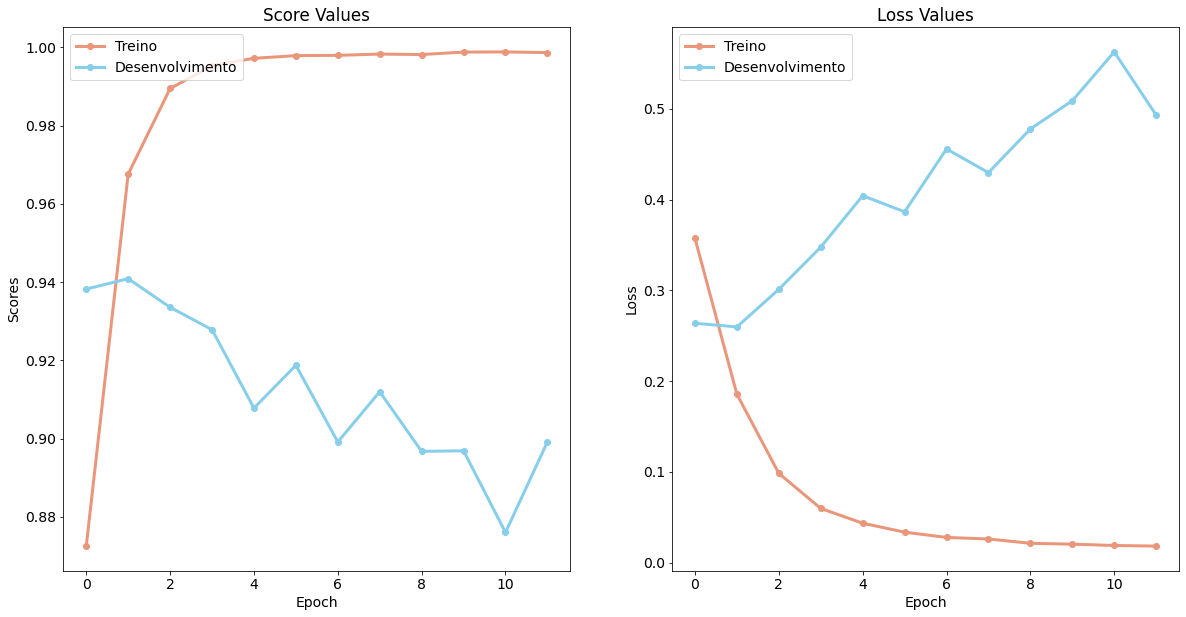

In [ ]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [ ]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict([X_test_ids, X_test_masks]))

print(classification_report(y_test, y_pred, target_names=labels))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond_8/Identity:0' shape=(None, 60) dtype=int32>, <tf.Tensor 'cond_8/Identity_1:0' shape=(None, 60) dtype=int32>]


              precision    recall  f1-score   support

      female       0.78      0.66      0.71      2122
        male       0.83      0.65      0.73      1542
     neutral       0.85      0.94      0.89      6336

   micro avg       0.83      0.84      0.83     10000
   macro avg       0.82      0.75      0.78     10000
weighted avg       0.83      0.84      0.83     10000
 samples avg       0.83      0.84      0.83     10000

